In [1]:
# !pip install pandas;
# !pip install seaborn
# !pip install numpy
# !pip install matplotlib;

import pandas as pd;
import seaborn as sns;
import numpy as np;
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE

In [5]:
obesity_dataset = pd.read_csv('obesity_dataset.csv');
dataset = obesity_dataset.copy()
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
dataset.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### **Exploratory/Missing Data Analysis**

The cell below checks if there are any rows in the dataset with missing values or not. We also performed univariate analysis and multivariate analysis. We plotted histograms, bar charts and a heatmap/correlation analysis.

In [8]:
dataset.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [9]:
dataset = dataset.drop(columns=['NObeyesdad'])

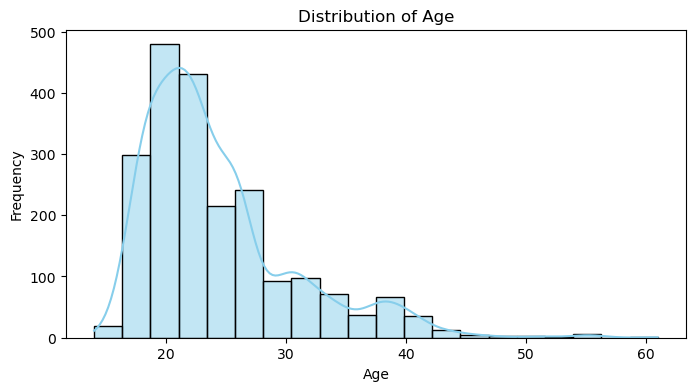

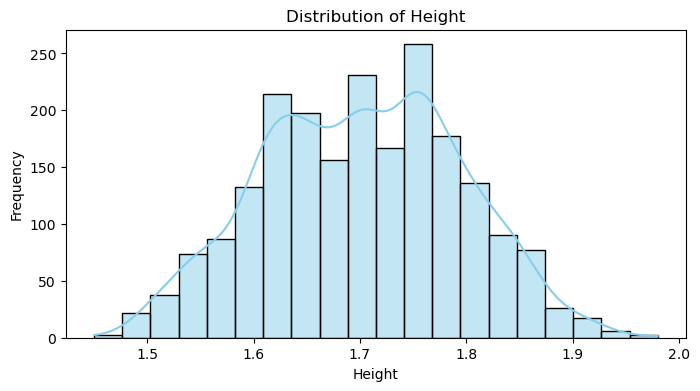

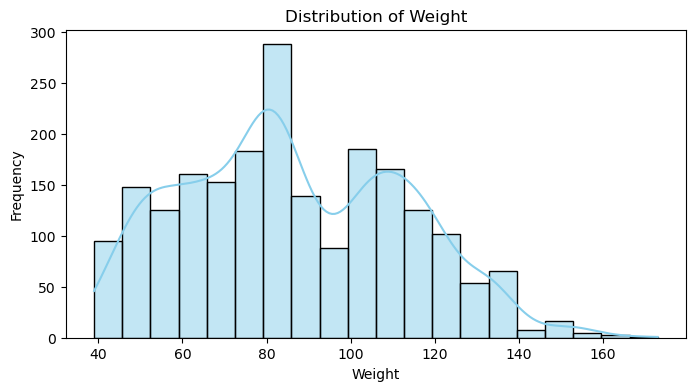

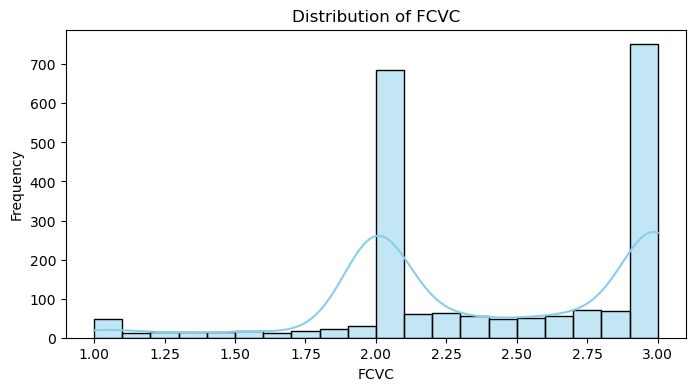

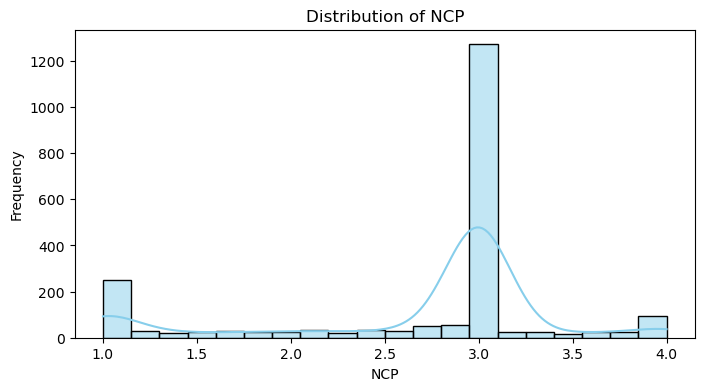

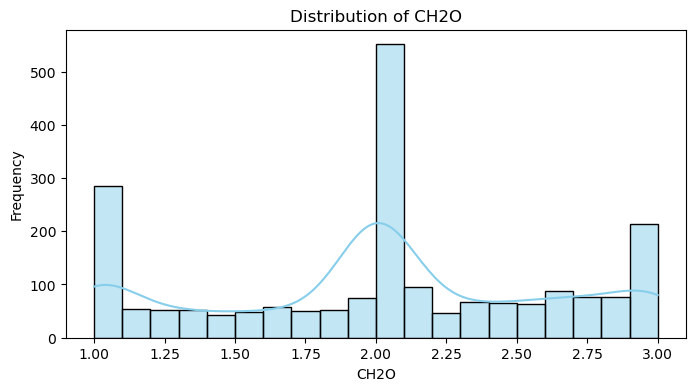

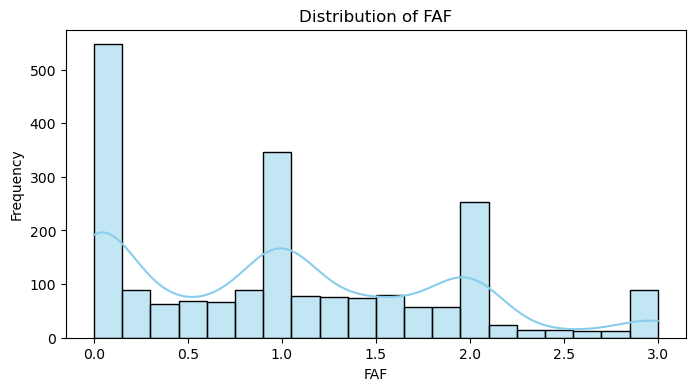

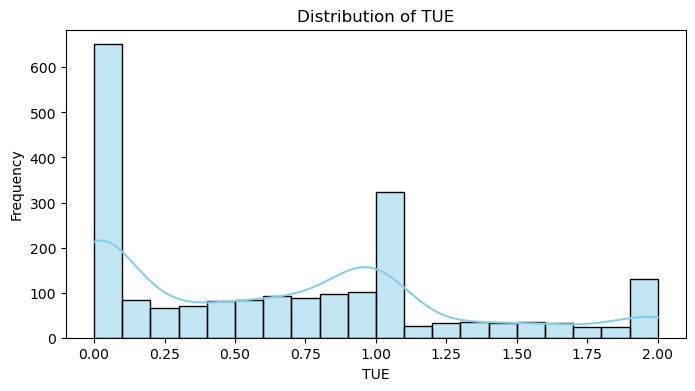

In [10]:
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(dataset[col], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

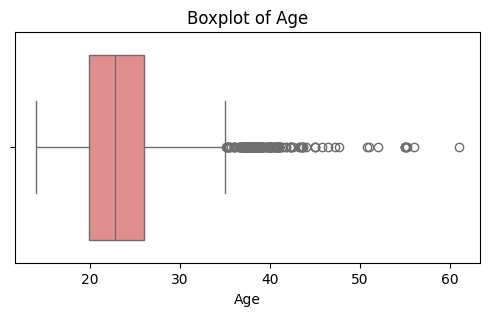

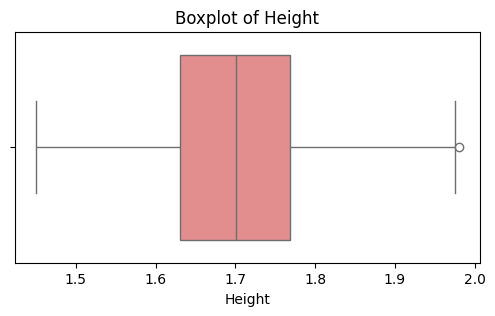

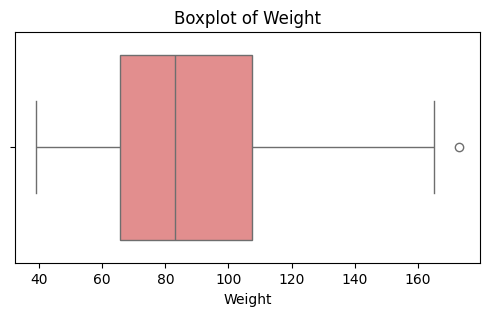

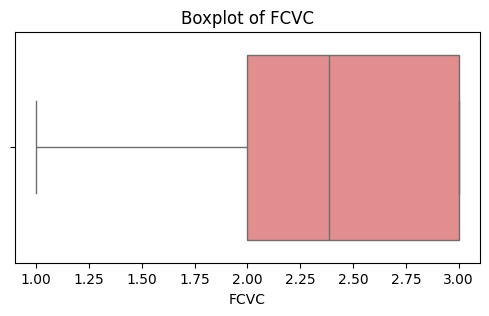

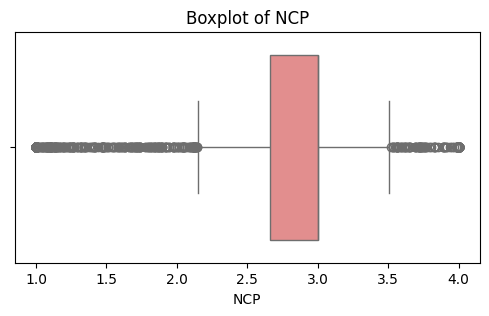

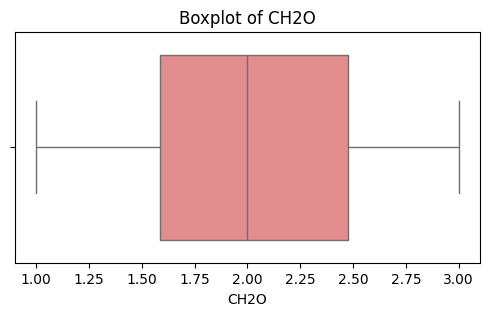

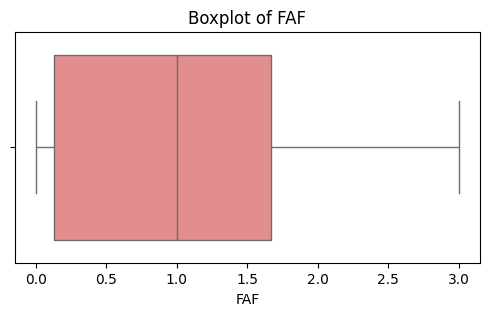

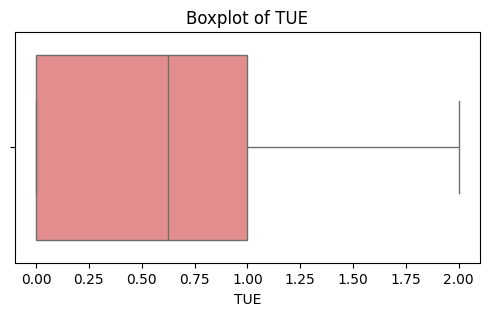

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=dataset[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.show()


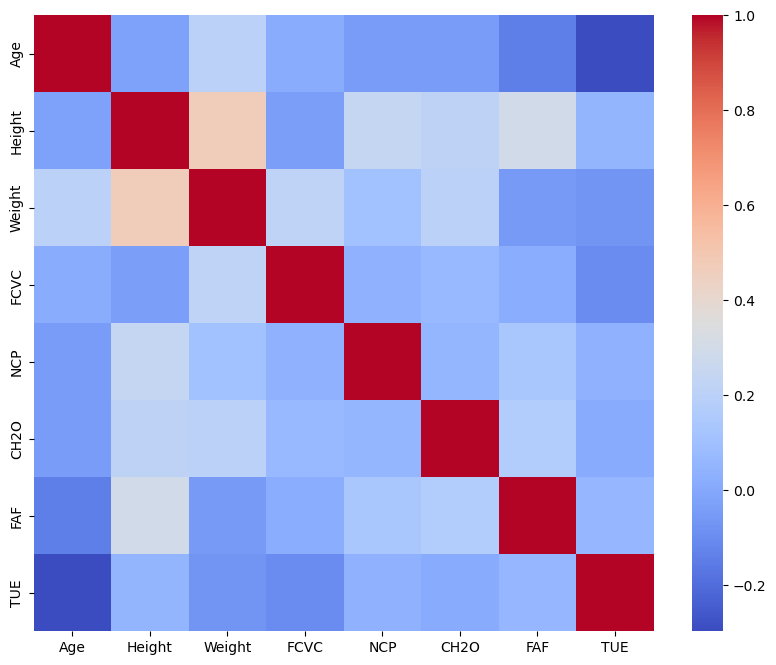

In [11]:
# Calculate the correlation matrix
num_cols = dataset.select_dtypes(include=[np.number]).columns
Xnum = dataset[num_cols]

correlation_matrix = Xnum.corr()

# Create the heatmap
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm')
plt.show()

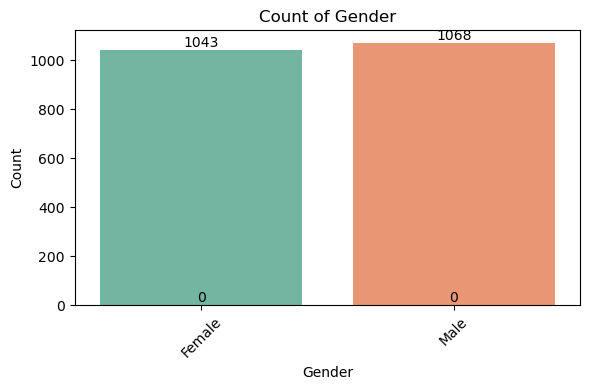

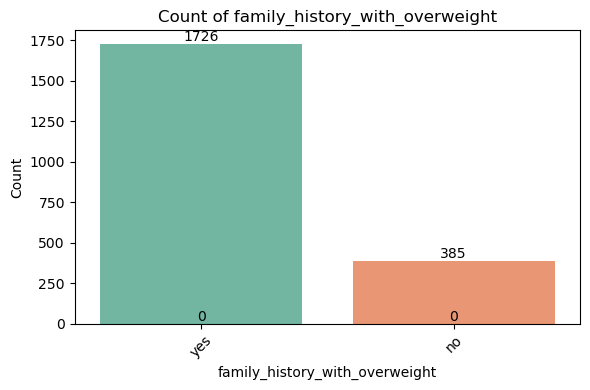

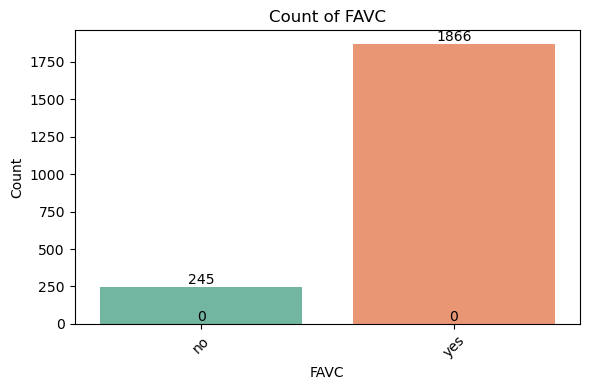

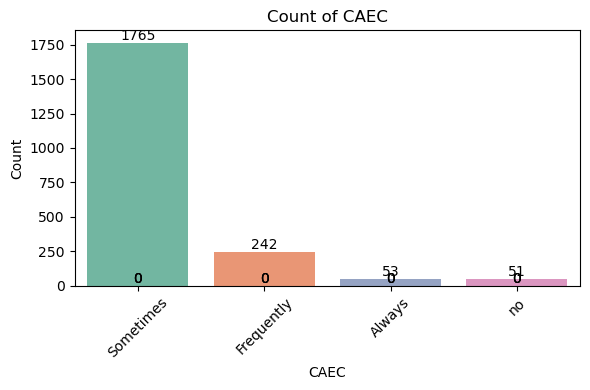

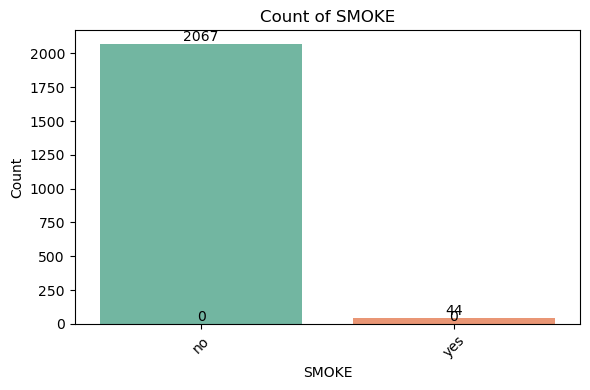

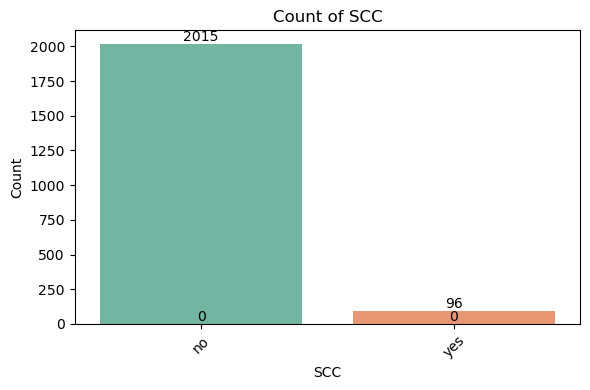

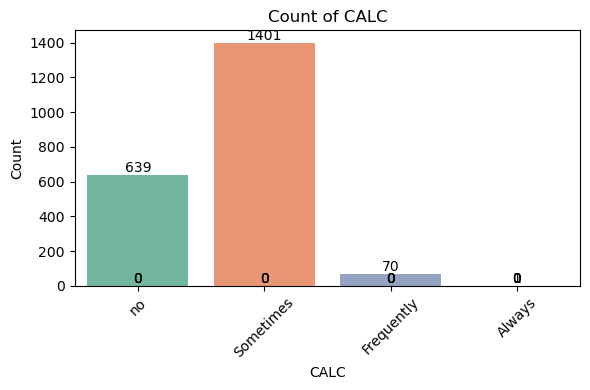

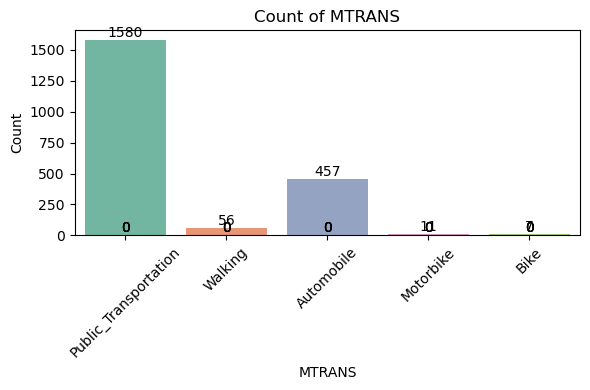

In [12]:


cat_cols = dataset.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(data=dataset, x=col, hue=col, palette='Set2', dodge=False)
    # hide the redundant legend created by hue=col
    if ax.get_legend() is not None:
        ax.get_legend().remove()
    ax.set_title(f'Count of {col}')
    ax.set_xlabel(col); ax.set_ylabel('Count')
    plt.xticks(rotation=45)
    # optional: add labels
    for c in ax.containers: ax.bar_label(c, fmt='%d')
    plt.tight_layout()
    plt.show()


### PREPROCESSING


*  Standardize numeric features
*  Convert categorical columns into numeric vectors using this methods like one hot encoding and ordinal encoding.

In [15]:
num_cols = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
cat_cols = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]

numeric_pipe = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

pre = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols),
    ],
    remainder="drop"
)

# Fit/transform to get the final numeric feature matrix X
X = pre.fit_transform(dataset)


# Keep feature names after OHE for reporting
ohe = pre.named_transformers_["cat"]["ohe"]
num_names = num_cols
cat_names = list(ohe.get_feature_names_out(cat_cols))
feature_names = num_names + cat_names


In [16]:
# DIMENSIONALITY REDUCTION for visualization only (PCA to 2D)

pca2 = PCA(n_components=2, random_state=42)
X2 = pca2.fit_transform(X)

In [17]:
# SEARCH RANGE FOR k AND OPTIMIZATION METRICS
# We'll evaluate k in [2..10] with:
#  - Elbow: inertia_ (WCSS), - Silhouette (higher is better), - Calinski–Harabasz (higher is better), - Davies–Bouldin (lower is better)
# Then propose an "optimal" k by consensus among the metrics.

k_range = range(2, 11)

wcss = []           # inertia (lower is better; elbow detection is visual)
sil_scores = []     # higher better
ch_scores = []      # higher better
db_scores = []      # lower better

for k in k_range:
    km = KMeans(n_clusters=k, n_init="auto", random_state=42)
    labels_km = km.fit_predict(X)

    wcss.append(km.inertia_)
    sil_scores.append(silhouette_score(X, labels_km))
    ch_scores.append(calinski_harabasz_score(X, labels_km))
    db_scores.append(davies_bouldin_score(X, labels_km))

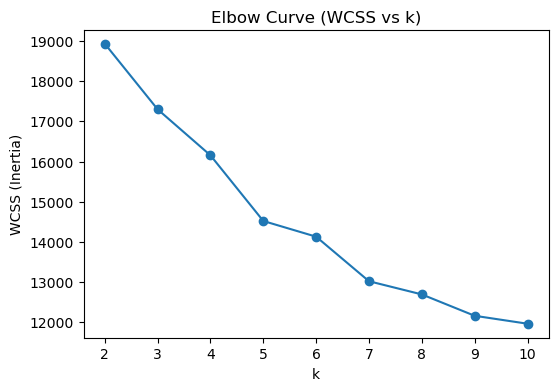

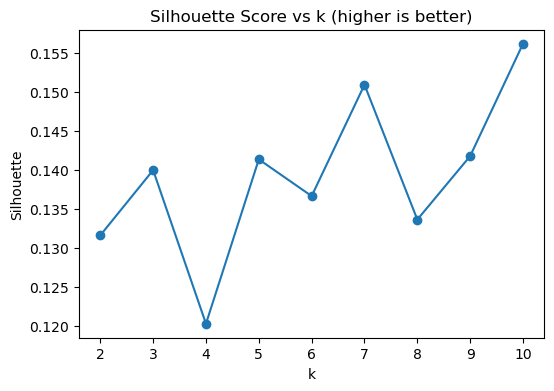

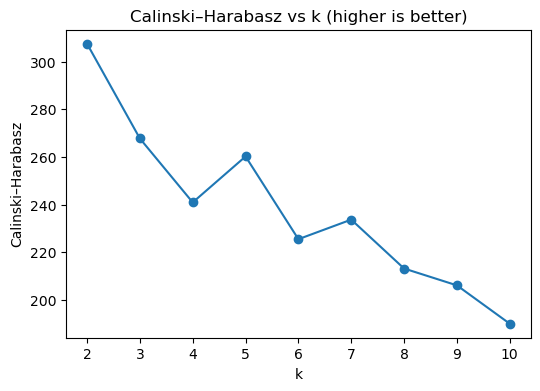

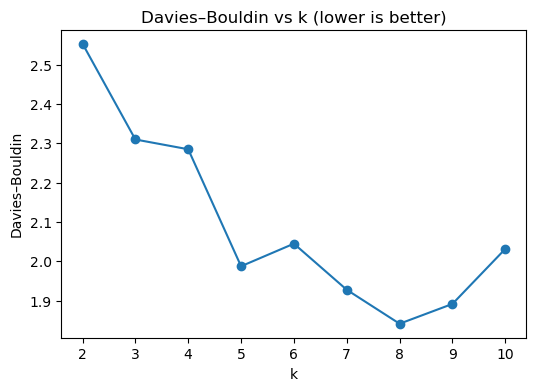

In [18]:
# Plot Elbow (WCSS) and Validity Indices vs k
# (Use these plots to visually confirm the automatic choice)

plt.figure(figsize=(6,4))
plt.plot(list(k_range), wcss, marker="o")
plt.title("Elbow Curve (WCSS vs k)")
plt.xlabel("k")
plt.ylabel("WCSS (Inertia)")
plt.show()

plt.figure(figsize=(6,4))
plt.plot(list(k_range), sil_scores, marker="o")
plt.title("Silhouette Score vs k (higher is better)")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.show()

plt.figure(figsize=(6,4))
plt.plot(list(k_range), ch_scores, marker="o")
plt.title("Calinski–Harabasz vs k (higher is better)")
plt.xlabel("k")
plt.ylabel("Calinski–Harabasz")
plt.show()

plt.figure(figsize=(6,4))
plt.plot(list(k_range), db_scores, marker="o")
plt.title("Davies–Bouldin vs k (lower is better)")
plt.xlabel("k")
plt.ylabel("Davies–Bouldin")
plt.show()


## plt.savefig("elbow_silhouette.png", dpi=300, bbox_inches='tight')


In [19]:
# CONSENSUS k SELECTION using the different methods below
#  - Silhouette: argmax,  - Calinski–Harabasz: argmax,  - Davies–Bouldin: argmin,- Elbow/WCSS: we approximate elbow by the "knee" where first

def argmax_on_list(values, k_vals):
    idx = int(np.argmax(values))
    return k_vals[idx]

def argmin_on_list(values, k_vals):
    idx = int(np.argmin(values))
    return k_vals[idx]

k_sil = argmax_on_list(sil_scores, list(k_range))
k_ch  = argmax_on_list(ch_scores, list(k_range))
k_db  = argmin_on_list(db_scores, list(k_range))

# crude elbow via curvature: compute second finite difference on WCSS
wcss_arr = np.array(wcss, dtype=float)
second_diff = np.diff(wcss_arr, n=2)  # length = len(k_range)-2
# elbow as index where curvature magnitude is largest (most negative usually)
elbow_idx = int(np.argmin(second_diff)) + 2  # shift because n=2 diff shrinks by 2
k_elbow = list(k_range)[elbow_idx]

# If there's a tie, prefer the median or average of all votes
votes = [k_elbow, k_sil, k_ch, k_db]

if len(set(votes)) == len(votes):  # all unique, no majority
    # Use the median or rounded mean of all suggestions
    k_star = int(round(np.median(votes)))
else:
    k_values, counts = np.unique(votes, return_counts=True)
    k_star = int(k_values[np.argmax(counts)])

print(f"--> CONSENSUS k*: {k_star}")


print("K candidates:")
print(f"  Elbow (heuristic): k={k_elbow}")
print(f"  Silhouette best : k={k_sil}")
print(f"  Calinski–Harabasz best : k={k_ch}")
print(f"  Davies–Bouldin best : k={k_db}")
print(f"--> CONSENSUS k*: {k_star}")

--> CONSENSUS k*: 8
K candidates:
  Elbow (heuristic): k=7
  Silhouette best : k=10
  Calinski–Harabasz best : k=2
  Davies–Bouldin best : k=8
--> CONSENSUS k*: 8


In [20]:
# FIT FINAL MODELS
#    A) K-Means with k*
#    B) Agglomerative (Ward linkage, Euclidean) with k*

kmeans_final = KMeans(n_clusters=k_star, n_init="auto", random_state=42)
labels_km = kmeans_final.fit_predict(X)

agg_final = AgglomerativeClustering(
    n_clusters=k_star, linkage="ward"  # Ward works with Euclidean; good for continuous spaces
)
labels_ag = agg_final.fit_predict(X)




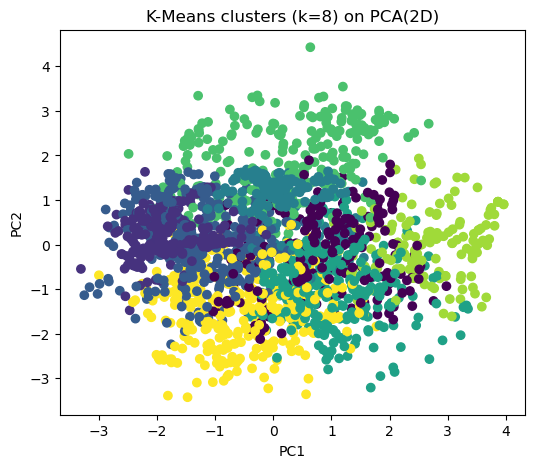

In [21]:
# VISUALIZE CLUSTERS (2D PCA PROJECTIONS)

fig, ax = plt.subplots(figsize=(6,5))
scatter = ax.scatter(X2[:,0], X2[:,1], c=labels_km)
ax.set_title(f"K-Means clusters (k={k_star}) on PCA(2D)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

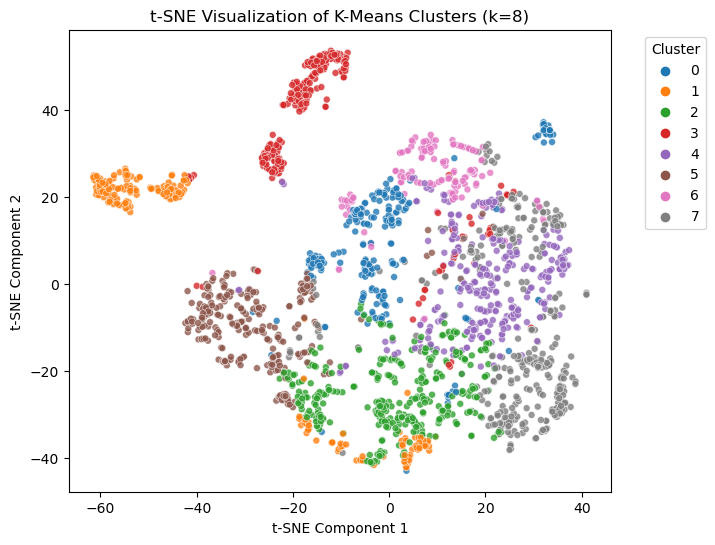

In [23]:
# Fit t-SNE on the preprocessed data (same input used for K-Means) ---
tsne = TSNE(
    n_components=2,      # project to 2D
    perplexity=40,       # balance between local/global structure
    learning_rate=200,   # typical range: 100–1000
    n_iter=1000,         # iterations; increase for more stability
    random_state=42      # reproducibility
)

X_tsne = tsne.fit_transform(X)  # shape: (n_samples, 2)

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = labels_km  # use your K-Means labels

# --- Plot ---
plt.figure(figsize=(7,6))
sns.scatterplot(
    data=tsne_df,
    x='TSNE1', y='TSNE2',
    hue='Cluster',
    palette='tab10',
    s=25, alpha=0.8
)
plt.title(f't-SNE Visualization of K-Means Clusters (k={kmeans_final.n_clusters})')
plt.xlabel('t-SNE Component 1'); plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


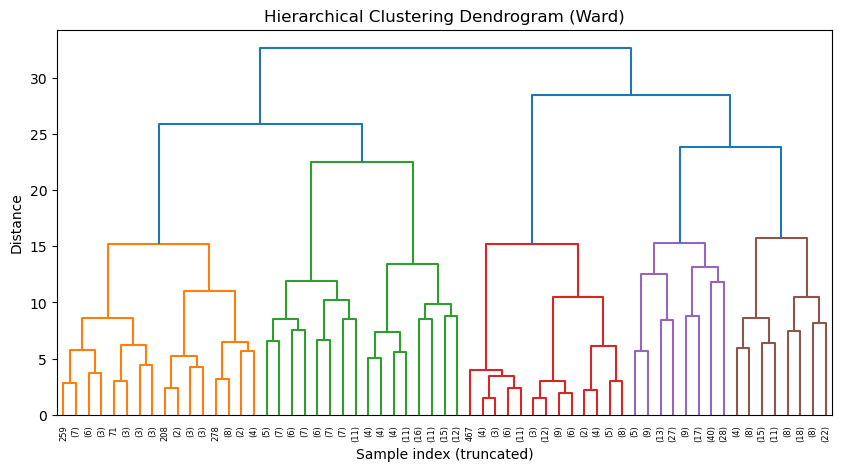

In [24]:
# HIERARCHICAL DENDROGRAM
max_for_tree = 500
idx = np.random.RandomState(42).choice(X.shape[0], size=min(X.shape[0], max_for_tree), replace=False)

# Ward linkage on a sample to draw the tree
Z = linkage(X[idx], method="ward")  # builds the hierarchical tree
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode="level", p=5)  # show top levels; adjust p for detail
plt.title("Hierarchical Clustering Dendrogram (Ward)")
plt.xlabel("Sample index (truncated)")
plt.ylabel("Distance")
plt.show()

In [25]:
# QUICK CLUSTER SUMMARIES

def cluster_summary(labels, X_df):
    # numeric-only summary for readability
    # (You can adapt this to show proportions for OHE categorical groups)
    summary = X_df.copy()
    summary["cluster"] = labels
    return summary.groupby("cluster").agg(["mean", "std", "count"])

# Build a numeric-only view from the original df for an interpretable summary
num_view = dataset[num_cols].copy()
print("\nK-Means cluster summary (numeric features):")
display(cluster_summary(labels_km, num_view))

print("\nAgglomerative cluster summary (numeric features):")
display(cluster_summary(labels_ag, num_view))


K-Means cluster summary (numeric features):


Age                    Height                      Weight  \
              mean       std count      mean       std count        mean   
cluster                                                                    
0        21.864637  3.226227   233  1.675225  0.077773   233   80.891103   
1        22.688877  3.565456   215  1.778244  0.049756   215  130.366910   
2        25.141033  4.304445   355  1.790914  0.060866   355  103.592840   
3        24.910432  2.147063   228  1.643406  0.034303   228  102.316680   
4        20.647166  3.055519   315  1.663303  0.066974   315   66.930031   
5        37.057163  5.419740   269  1.669643  0.081745   269   85.364235   
6        20.981444  3.057559   146  1.563699  0.048871   146   50.999764   
7        20.603312  3.132437   350  1.736415  0.081981   350   69.460258   

                              FCVC  ...   NCP      CH2O                  \
               std count      mean  ... count      mean       std count   
cluster                             ...                                   
0        15.017130   233  2.301277  ...   233  2.107981  0.598258   233   
1        12.272033   215  2.958996  ...   215  2.239509  0.533348   215   
2        15.603556   355  2.014231  ...   355  2.149377  0.492757   355   
3        15.688901   228  2.973098  ...   228  2.177178  0.640683   228   
4        14.881167   315  1.972554  ...   315  1.643197  0.517981   315   
5        15.779924   269  2.425523  ...   269  1.794297  0.616570   269   
6         9.796469   146  2.586826  ...   146  1.499040  0.518148   146   
7        15.347979   350  2.542295  ...   350  2.250570  0.547350   350   

              FAF                       TUE                  
             mean       std count      mean       std count  
cluster                                                      
0        0.918082  0.799489   233  0.779142  0.685936   233  
1        1.342231  0.467074   215  0.784156  0.433937   215  
2        0.846927  0.567293   355  0.520801  0.537118   355  
3        0.152382  0.281550   228  0.450949  0.324814   228  
4        0.702166  0.658697   315  1.086906  0.607684   315  
5        0.981589  0.869330   269  0.212149  0.373900   269  
6        0.555590  0.656992   146  0.396215  0.580614   146  
7        2.081421  0.618511   350  0.838942  0.651989   350  

[8 rows x 24 columns]


Agglomerative cluster summary (numeric features):


Age                    Height                      Weight  \
              mean       std count      mean       std count        mean   
cluster                                                                    
0        20.625908  2.875333   429  1.644012  0.073610   429   62.683078   
1        21.367153  2.941199   274  1.631408  0.079412   274   70.865027   
2        28.376267  5.366247   426  1.785132  0.058324   426  107.926567   
3        37.018224  6.371216   196  1.633492  0.074653   196   76.157709   
4        25.764430  0.572254   181  1.637437  0.026471   181  108.558321   
5        20.496185  3.107350   268  1.771970  0.064322   268   75.877126   
6        21.501986  2.631278   194  1.740545  0.071116   194   82.739645   
7        20.623760  1.449026   143  1.751001  0.039303   143  136.614440   

                              FCVC  ...   NCP      CH2O                  \
               std count      mean  ... count      mean       std count   
cluster                             ...                                   
0        14.879975   429  2.321349  ...   429  1.758033  0.618738   429   
1        18.059561   274  2.372041  ...   274  1.941002  0.677830   274   
2        13.940704   426  2.289248  ...   426  2.049375  0.588489   426   
3         9.537653   196  2.390165  ...   196  1.783843  0.551901   196   
4         3.832748   181  3.000000  ...   181  2.210019  0.639129   181   
5        16.101235   268  2.450457  ...   268  2.260916  0.482079   268   
6        19.310206   194  2.001997  ...   194  2.106891  0.490357   194   
7         9.343894   143  3.000000  ...   143  2.206562  0.558053   143   

              FAF                       TUE                  
             mean       std count      mean       std count  
cluster                                                      
0        1.062792  0.827687   429  0.645412  0.610843   429  
1        0.763054  0.804657   274  0.686511  0.688547   274  
2        1.041355  0.650424   426  0.465040  0.503839   426  
3        0.711539  0.830765   196  0.241569  0.437077   196  
4        0.067608  0.104165   181  0.453945  0.275799   181  
5        1.982666  0.722875   268  0.781212  0.655453   268  
6        0.710775  0.659508   194  1.407485  0.475451   194  
7        1.420725  0.421783   143  0.795340  0.136784   143  

[8 rows x 24 columns]

In [27]:
# ...existing code...
# attach kmeans labels to original dataframe and inspect textual/categorical fields
dataset['cluster_kmeans'] = labels_km

# 1) counts per cluster
print(dataset['cluster_kmeans'].value_counts().sort_index())

# 2) show which columns are "text" / categorical
print("\nCategorical/text columns:")
print(list(dataset.select_dtypes(include=['object']).columns))

# 3) show first 5 rows of each cluster (raw original values)
for c in sorted(dataset['cluster_kmeans'].unique()):
    print(f"\n--- Cluster {c} sample rows ---")
    display(dataset[dataset['cluster_kmeans'] == c].head(5))

# 4) representative row per cluster: nearest to KMeans centroid (distance in transformed X space)
import numpy as np
dists = np.linalg.norm(X[:, None, :] - kmeans_final.cluster_centers_[None, :, :], axis=2)  # shape (n_samples, k)
rep_indices = dists.argmin(axis=0)  # one index per centroid
print("\nRepresentative (nearest-centroid) row per cluster:")
for c, idx in enumerate(rep_indices):
    print(f"\nCluster {c} -> row index {idx}")
    display(dataset.iloc[[idx]])

cluster_kmeans
0    233
1    215
2    355
3    228
4    315
5    269
6    146
7    350
Name: count, dtype: int64

Categorical/text columns:
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

--- Cluster 0 sample rows ---


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,cluster_kmeans
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,0
14,Male,23.0,1.77,60.0,yes,yes,3.0,1.0,Sometimes,no,1.0,no,1.0,1.0,Sometimes,Public_Transportation,0
19,Female,23.0,1.65,70.0,yes,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,0
23,Female,22.0,1.60,82.0,yes,yes,1.0,1.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,0
26,Male,21.0,1.70,65.0,yes,yes,2.0,1.0,Frequently,no,2.0,no,1.0,2.0,Always,Walking,0



--- Cluster 1 sample rows ---


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,cluster_kmeans
10,Male,26.0,1.85,105.0,yes,yes,3.0,3.0,Frequently,no,3.0,no,2.0,2.0,Sometimes,Public_Transportation,1
225,Male,25.0,1.83,121.0,yes,no,3.0,3.0,Sometimes,no,3.0,no,2.0,0.0,Sometimes,Walking,1
229,Male,32.0,1.75,120.0,yes,no,3.0,3.0,Sometimes,no,3.0,no,0.0,2.0,no,Automobile,1
342,Male,23.0,1.74,105.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Public_Transportation,1
344,Male,18.0,1.87,173.0,yes,yes,3.0,3.0,Frequently,no,2.0,no,2.0,1.0,Sometimes,Public_Transportation,1



--- Cluster 2 sample rows ---


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,cluster_kmeans
16,Male,27.0,1.93,102.0,yes,yes,2.0,1.0,Sometimes,no,1.0,no,1.0,0.0,Sometimes,Public_Transportation,2
24,Male,21.0,1.85,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,Sometimes,Public_Transportation,2
30,Male,29.0,1.77,83.0,no,yes,1.0,4.0,Frequently,no,3.0,no,0.0,1.0,no,Motorbike,2
44,Male,21.0,1.81,80.0,no,no,1.0,3.0,no,no,2.0,no,2.0,0.0,no,Public_Transportation,2
46,Male,21.0,1.82,72.0,yes,yes,1.0,3.0,Frequently,no,3.0,no,2.0,0.0,Sometimes,Public_Transportation,2



--- Cluster 3 sample rows ---


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,cluster_kmeans
22,Female,22.0,1.65,60.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Automobile,3
48,Female,20.0,1.66,60.0,yes,no,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Walking,3
50,Female,21.0,1.61,54.5,yes,yes,3.0,3.0,Sometimes,no,3.0,no,0.0,1.0,Sometimes,Walking,3
77,Female,24.0,1.70,80.0,yes,yes,2.0,3.0,Sometimes,no,3.0,no,0.0,0.0,no,Public_Transportation,3
91,Female,20.0,1.61,64.0,yes,no,3.0,3.0,Always,no,2.0,yes,0.0,1.0,Frequently,Public_Transportation,3



--- Cluster 4 sample rows ---


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,cluster_kmeans
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,4
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,4
27,Female,23.0,1.60,52.0,no,yes,2.0,4.0,Frequently,no,2.0,no,2.0,1.0,Sometimes,Automobile,4
35,Female,21.0,1.50,65.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,2.0,Sometimes,Public_Transportation,4
38,Male,23.0,1.65,67.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,4



--- Cluster 5 sample rows ---


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,cluster_kmeans
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,5
13,Male,41.0,1.80,99.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Automobile,5
18,Female,30.0,1.71,82.0,yes,yes,3.0,4.0,Frequently,yes,1.0,no,0.0,0.0,no,Automobile,5
21,Female,52.0,1.69,87.0,yes,yes,3.0,1.0,Sometimes,yes,2.0,no,0.0,0.0,no,Automobile,5
33,Male,39.0,1.79,90.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,5



--- Cluster 6 sample rows ---


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,cluster_kmeans
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,6
17,Female,29.0,1.53,78.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,no,Automobile,6
31,Female,31.0,1.58,68.0,yes,no,2.0,1.0,Sometimes,no,1.0,no,1.0,0.0,Sometimes,Public_Transportation,6
36,Female,22.0,1.56,49.0,no,yes,2.0,3.0,Sometimes,no,1.0,yes,2.0,0.0,no,Walking,6
37,Female,21.0,1.60,48.0,no,yes,2.0,3.0,Sometimes,no,1.0,no,1.0,0.0,Sometimes,Public_Transportation,6



--- Cluster 7 sample rows ---


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,cluster_kmeans
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,7
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,7
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,7
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,7
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,7



Representative (nearest-centroid) row per cluster:

Cluster 0 -> row index 1092


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,cluster_kmeans
1092,Male,22.18881,1.717722,81.92991,yes,yes,2.0,1.152521,Sometimes,no,1.723159,no,1.39016,1.094941,Sometimes,Public_Transportation,0



Cluster 1 -> row index 1917


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,cluster_kmeans
1917,Female,21.768153,1.76416,133.888629,yes,yes,3.0,3.0,Sometimes,no,2.32502,no,1.441791,0.918468,Sometimes,Public_Transportation,1



Cluster 2 -> row index 1544


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,cluster_kmeans
1544,Male,23.963649,1.792998,116.102615,yes,yes,1.994679,3.0,Sometimes,no,2.0,no,0.966617,0.739006,Sometimes,Public_Transportation,2



Cluster 3 -> row index 2039


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,cluster_kmeans
2039,Female,25.951737,1.629442,104.835346,yes,yes,3.0,3.0,Sometimes,no,2.225139,no,0.035928,0.565315,Sometimes,Public_Transportation,3



Cluster 4 -> row index 208


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,cluster_kmeans
208,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,4



Cluster 5 -> row index 1205


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,cluster_kmeans
1205,Female,33.864257,1.679299,77.355417,yes,yes,2.76802,2.137068,Sometimes,no,1.873591,no,0.966973,0.691944,no,Automobile,5



Cluster 6 -> row index 740


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,cluster_kmeans
740,Female,19.0,1.53161,42.0,no,yes,2.749268,1.394539,Frequently,no,1.322048,no,0.463949,0.800993,Sometimes,Public_Transportation,6



Cluster 7 -> row index 886


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,cluster_kmeans
886,Male,19.478533,1.804099,85.196279,yes,yes,2.459976,3.30846,Sometimes,no,2.078011,no,1.779646,0.871772,Sometimes,Public_Transportation,7
